In [68]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
regr = LinearRegression()
import xgboost
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df =pd.read_csv("../../../data/kc_house_data.csv")

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
df["waterfront"].fillna("0", inplace = True)
df["view"].fillna("0", inplace = True)

In [6]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
df['renovation_yes'] = (~np.isnan(df['yr_renovated'])).astype(int)

In [8]:
df.isna().sum()

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated      3842
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
renovation_yes       0
dtype: int64

In [9]:
df = df.drop("id", axis=1)
df = df.drop("sqft_basement", axis=1)

In [10]:
df.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovation_yes
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845,0.002127
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.012265
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303,0.013109
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342,0.009294
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.009493
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.006914
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.002522
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,-0.146896,1.000000,0.756073,0.447865,0.016669,-0.185771,0.113575,0.200341,0.713867,0.120981,0.006782
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,-0.158904,0.756073,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077,0.007703
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.361592,0.447865,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777,0.007925


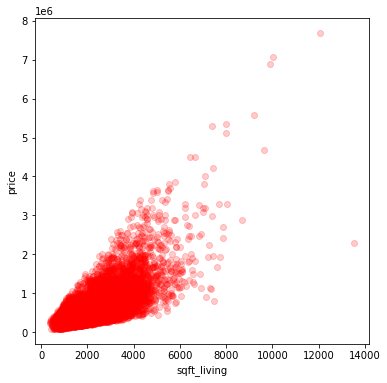

In [11]:
plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.scatter(df["sqft_living"], df["price"], color='r', alpha=0.20)
ax.set_xlabel('sqft_living')
ax.set_ylabel('price')
plt.show();

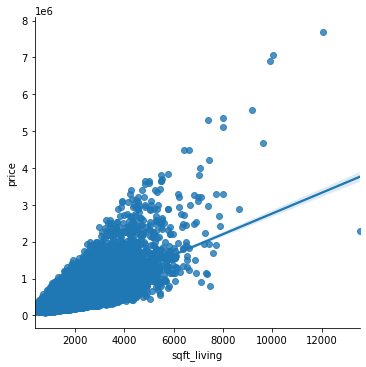

In [12]:
sns.lmplot(x='sqft_living', y='price', data=df)
plt.show()

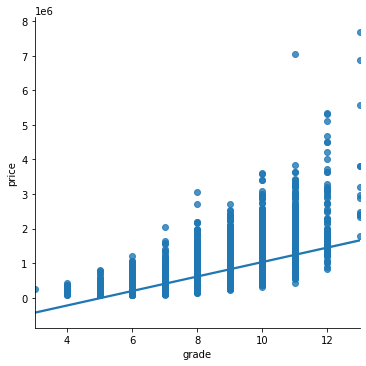

In [13]:
sns.lmplot(x='grade', y='price', data=df)
plt.show()

In [14]:
model = sm.OLS(df['sqft_living'], df['price'])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            sqft_living   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.839
Method:                 Least Squares   F-statistic:                          1.124e+05
Date:                Wed, 30 Jun 2021   Prob (F-statistic):                        0.00
Time:                        09:32:38   Log-Likelihood:                     -1.7786e+05
No. Observations:               21597   AIC:                                  3.557e+05
Df Residuals:                   21596   BIC:                                  3.557e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [15]:
model = sm.OLS(df['grade'], df['price'])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  grade   R-squared (uncentered):                   0.764
Model:                            OLS   Adj. R-squared (uncentered):              0.764
Method:                 Least Squares   F-statistic:                          7.006e+04
Date:                Wed, 30 Jun 2021   Prob (F-statistic):                        0.00
Time:                        09:32:38   Log-Likelihood:                         -59251.
No. Observations:               21597   AIC:                                  1.185e+05
Df Residuals:                   21596   BIC:                                  1.185e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [16]:
model = sm.OLS(df['sqft_above'], df['price'])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             sqft_above   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.798
Method:                 Least Squares   F-statistic:                          8.544e+04
Date:                Wed, 30 Jun 2021   Prob (F-statistic):                        0.00
Time:                        09:32:38   Log-Likelihood:                     -1.7720e+05
No. Observations:               21597   AIC:                                  3.544e+05
Df Residuals:                   21596   BIC:                                  3.544e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [17]:
model2 = sm.OLS(df['bathrooms'], df['price'])
results = model2.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              bathrooms   R-squared (uncentered):                   0.771
Model:                            OLS   Adj. R-squared (uncentered):              0.771
Method:                 Least Squares   F-statistic:                          7.282e+04
Date:                Wed, 30 Jun 2021   Prob (F-statistic):                        0.00
Time:                        09:32:38   Log-Likelihood:                         -32240.
No. Observations:               21597   AIC:                                  6.448e+04
Df Residuals:                   21596   BIC:                                  6.449e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [18]:
model3 = sm.OLS(df["price"], sm.add_constant(df["sqft_living"])).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:32:38   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

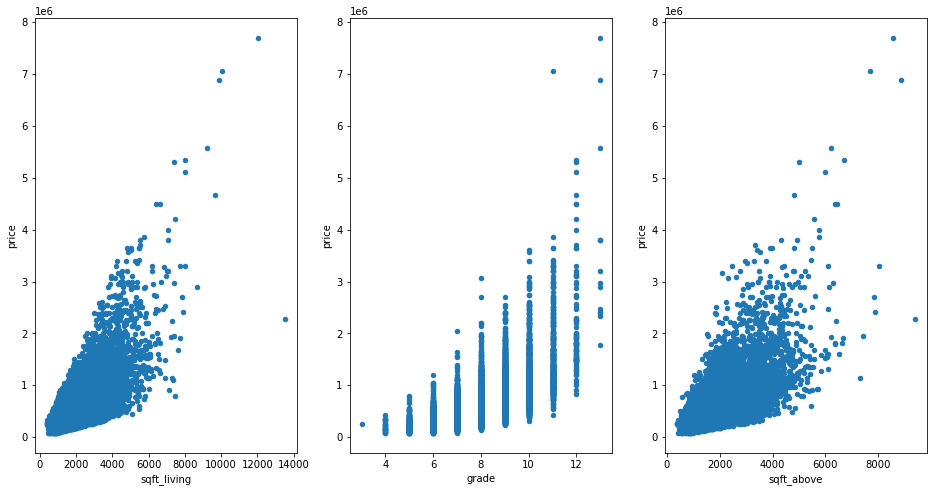

In [19]:
fig, axs = plt.subplots(1, 3,)
df.plot(kind='scatter', x='sqft_living', y='price', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='grade', y='price', ax=axs[1])
df.plot(kind='scatter', x='sqft_above', y='price', ax=axs[2])

In [20]:
f = 'price ~ sqft_living + grade + sqft_above'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     8494.
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:32:39   Log-Likelihood:            -2.9897e+05
No. Observations:               21597   AIC:                         5.980e+05
Df Residuals:                   21593   BIC:                         5.980e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.564e+05   1.36e+04    -48.298      0.000   -6.83e+05    -6.3e+05
sqft_living   234.5900      4.039     58.075      0.000     226.672     242.508
grade        1.108e+05   2325.608     47.637      0.000    1.06e+05    1.15e+05
sqft_above    -78.0959      4.427    -17.642      0.000     -86.773     -69.419
==============================================================================
Omnibus:                    17102.886   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1062513.676
Skew:                           3.332   Prob(JB):                         0.00
Kurtosis:                      36.709   Cond. No.                     2.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
f = 'price ~ sqft_living + grade + bathrooms'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     8359.
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:32:39   Log-Likelihood:            -2.9907e+05
No. Observations:               21597   AIC:                         5.981e+05
Df Residuals:                   21593   BIC:                         5.982e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.024e+05   1.33e+04    -45.279      0.000   -6.28e+05   -5.76e+05
sqft_living   203.1650      3.339     60.855      0.000     196.621     209.709
grade        1.046e+05   2293.086     45.626      0.000       1e+05    1.09e+05
bathrooms   -3.836e+04   3454.677    -11.103      0.000   -4.51e+04   -3.16e+04
==============================================================================
Omnibus:                    16926.041   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1008526.554
Skew:                           3.291   Prob(JB):                         0.00
Kurtosis:                      35.824   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
features = ['grade', 'sqft_living', 'bathrooms']
X = df[features]
y = df.price

mlr = LinearRegression() #instantiate 
mlr.fit(X, y) #fit 

print(mlr.coef_)
print(mlr.score(X,y))
# adjusted R-squared
print(1 - ( 1 - mlr.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ))

[104623.84505781    203.16503658 -38357.50160684]
0.5373402425376977
0.5372759634068504


In [23]:
X= df[["sqft_living", "grade", "bathrooms"]]
y= df[["price"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_living  21597 non-null  int64  
 1   grade        21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 506.3 KB


In [24]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, random_state=42)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_living  21597 non-null  int64  
 1   grade        21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 506.3 KB


In [25]:
new_model = LinearRegression()
new_model.fit(X_train2, y_train2)
final_predict_train = new_model.predict(X_train2)
final_predict_test = new_model.predict(X_test2)
print('Training Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train2, final_predict_train)))
print('Test Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test2, final_predict_test)))

Training Root Mean Squared Error: 252243.3456376041
Test Root Mean Squared Error: 239004.36226040026


In [26]:
from scipy import stats


In [27]:
X= df[["sqft_living", "grade", "bathrooms"]]
y= df[["price"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_living  21597 non-null  int64  
 1   grade        21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 506.3 KB


In [28]:
X= df[["sqft_living", "grade", "bathrooms"]]
y= df[["price"]]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, random_state=42)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_living  21597 non-null  int64  
 1   grade        21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 506.3 KB


In [29]:
new_model = LinearRegression()
new_model.fit(X_train2, y_train2)
final_predict_train = new_model.predict(X_train2)
final_predict_test = new_model.predict(X_test2)
print('Training Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train2, final_predict_train)))
print('Test Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test2, final_predict_test)))

Training Root Mean Squared Error: 252243.3456376041
Test Root Mean Squared Error: 239004.36226040026


In [30]:
X= df[["sqft_living", "grade", "bathrooms"]]
y= df[["price"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_living  21597 non-null  int64  
 1   grade        21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 506.3 KB


In [31]:
X= df[["sqft_living"]]
y= df[["price"]]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, random_state=42)
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12147 entries, 18996 to 5406
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_living  12147 non-null  int64  
 1   grade        12147 non-null  int64  
 2   bathrooms    12147 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 379.6 KB


In [32]:
new_model = LinearRegression()
new_model.fit(X_train2, y_train2)
final_predict_train = new_model.predict(X_train2)
final_predict_test = new_model.predict(X_test2)
print('Training Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train2, final_predict_train)))
print('Test Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test2, final_predict_test)))

Training Root Mean Squared Error: 252243.3456376041
Test Root Mean Squared Error: 239004.36226040026


In [33]:
df.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovation_yes
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845,0.002127
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.012265
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303,0.013109
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342,0.009294
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.009493
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.006914
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.002522
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,-0.146896,1.000000,0.756073,0.447865,0.016669,-0.185771,0.113575,0.200341,0.713867,0.120981,0.006782
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,-0.158904,0.756073,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077,0.007703
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.361592,0.447865,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777,0.007925


In [34]:
df_top_4 = df[["price", "sqft_living", "bathrooms", "grade"]]

In [35]:
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(new_model, X, y, cv=5)

cv_results

array([0.49247636, 0.49640117, 0.47834581, 0.49508412, 0.49233925])

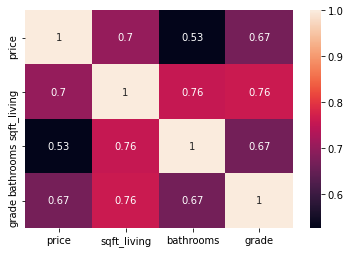

In [36]:
import seaborn as sns
sns.heatmap(df_top_4.corr(), annot=True);

In [37]:
print(X_train2.info())
print(y_train2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12147 entries, 18996 to 5406
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_living  12147 non-null  int64  
 1   grade        12147 non-null  int64  
 2   bathrooms    12147 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 379.6 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12147 entries, 18996 to 5406
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   12147 non-null  float64
dtypes: float64(1)
memory usage: 189.8 KB
None


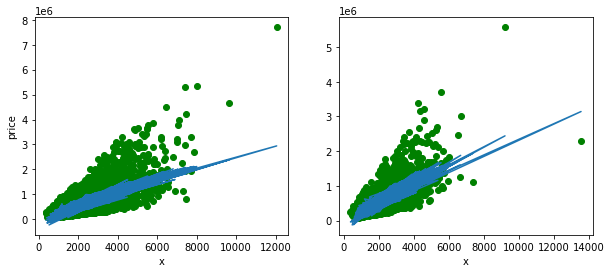

In [38]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_train2.sqft_living, y_train2, color='green')
plt.plot(X_train2.sqft_living, new_model.predict(X_train2))
plt.xlabel('x')
plt.ylabel('price')
plt.subplot(1, 2, 2)
plt.scatter(X_test2.sqft_living, y_test2, color='green')
plt.plot(X_test2.sqft_living, new_model.predict(X_test2))
plt.xlabel('x');

In [39]:
df.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovation_yes
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845,0.002127
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.012265
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303,0.013109
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342,0.009294
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.009493
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.006914
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.002522
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,-0.146896,1.000000,0.756073,0.447865,0.016669,-0.185771,0.113575,0.200341,0.713867,0.120981,0.006782
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,-0.158904,0.756073,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077,0.007703
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.361592,0.447865,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777,0.007925


In [40]:
df = df.drop("sqft_above", axis=1)

In [41]:
f = 'price ~ sqft_living + grade + bathrooms + bedrooms'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     6429.
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:32:41   Log-Likelihood:            -2.9892e+05
No. Observations:               21597   AIC:                         5.979e+05
Df Residuals:                   21592   BIC:                         5.979e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.813e+05    1.5e+04    -32.145      0.000   -5.11e+05   -4.52e+05
sqft_living   226.9304      3.592     63.177      0.000     219.890     233.971
grade        9.674e+04   2323.206     41.640      0.000    9.22e+04    1.01e+05
bathrooms   -2.722e+04   3491.838     -7.794      0.000   -3.41e+04   -2.04e+04
bedrooms    -3.965e+04   2304.000    -17.210      0.000   -4.42e+04   -3.51e+04
==============================================================================
Omnibus:                    16463.655   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           894495.760
Skew:                           3.179   Prob(JB):                         0.00
Kurtosis:                      33.880   Cond. No.                     2.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
df.isnull().sum()

date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
yr_built             0
yr_renovated      3842
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
renovation_yes       0
dtype: int64

In [43]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovation_yes
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.036056,0.667951,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845,0.002127
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.026496,0.356563,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.012265
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,-0.126479,0.665838,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303,0.013109
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,-0.059445,0.762779,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342,0.009294
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,-0.008830,0.114731,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.009493
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,-0.264075,0.458794,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.006914
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,1.000000,-0.146896,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.002522
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,-0.146896,1.000000,0.447865,0.016669,-0.185771,0.113575,0.200341,0.713867,0.120981,0.006782
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.361592,0.447865,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777,0.007925
yr_renovated,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,-0.061858,0.016669,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852,NaN


Text(0.5, 1.0, 'Sqft Living V.S. Price ')

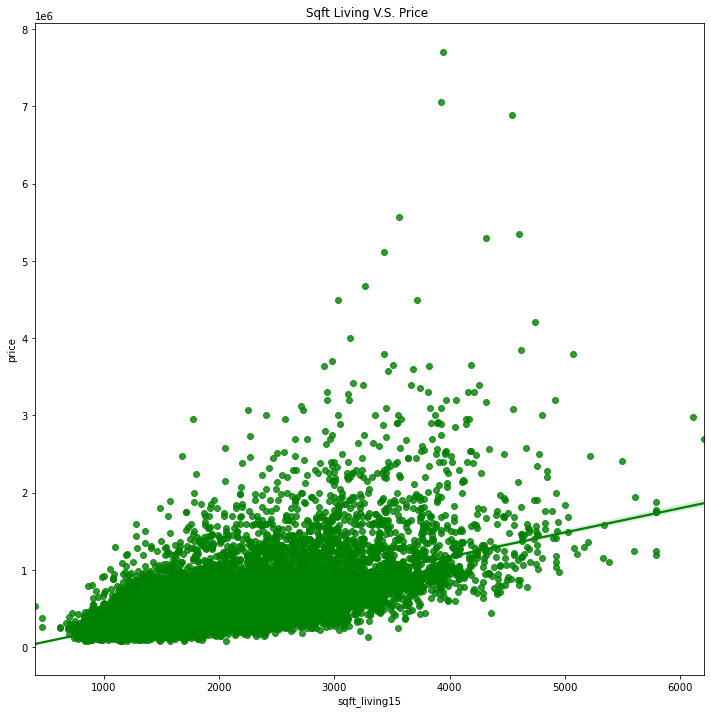

In [44]:
plt.figure(figsize= (12, 12))
sns.regplot(x = df['sqft_living15'], y = df['price'], data = df, color='green')
plt.title("Sqft Living V.S. Price ")

In [45]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovation_yes
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,0.0,98178,47.5112,-122.257,1340,5650,1
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,NaN,98028,47.7379,-122.233,2720,8062,0
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,0.0,98136,47.5208,-122.393,1360,5000,1
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,0.0,98074,47.6168,-122.045,1800,7503,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,2009,0.0,98103,47.6993,-122.346,1530,1509,1
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2014,0.0,98146,47.5107,-122.362,1830,7200,1
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,2009,0.0,98144,47.5944,-122.299,1020,2007,1
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,2004,0.0,98027,47.5345,-122.069,1410,1287,1


In [46]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovation_yes
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,3.409825,7.657915,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,0.822105
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950,0.382433
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,1.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,1.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,4.000000,8.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,1.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000


<AxesSubplot:title={'center':'Pearson Correlation of features'}>

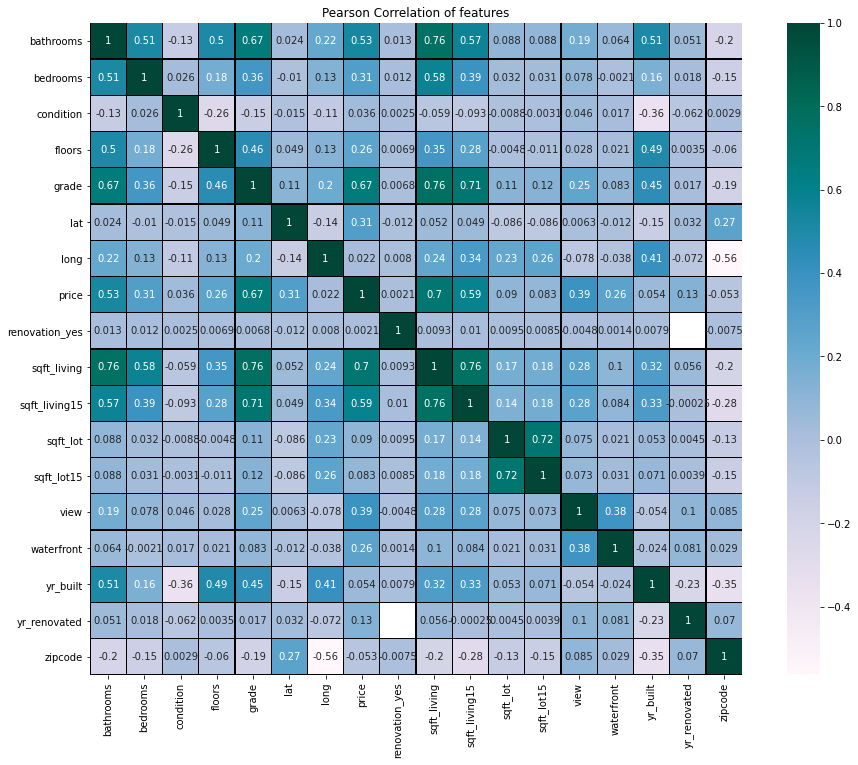

In [47]:
str_list = [] 
for colname, colvalue in df.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)

num_list = df.columns.difference(str_list) 

house_num = df[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')

sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1, square=True, cmap="PuBuGn", linecolor='k', annot=True)


In [48]:
new_data = df[['sqft_living','grade', 'sqft_living15','bathrooms','view','lat','yr_built','bedrooms']]

In [49]:
X = new_data.values
y = df.price.values

In [50]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            21597 non-null  object 
 1   price           21597 non-null  float64
 2   bedrooms        21597 non-null  int64  
 3   bathrooms       21597 non-null  float64
 4   sqft_living     21597 non-null  int64  
 5   sqft_lot        21597 non-null  int64  
 6   floors          21597 non-null  float64
 7   waterfront      21597 non-null  object 
 8   view            21597 non-null  object 
 9   condition       21597 non-null  int64  
 10  grade           21597 non-null  int64  
 11  yr_built        21597 non-null  int64  
 12  yr_renovated    17755 non-null  float64
 13  zipcode         21597 non-null  int64  
 14  lat             21597 non-null  float64
 15  long            21597 non-null  float64
 16  sqft_living15   21597 non-null  int64  
 17  sqft_lot15      21597 non-null 

In [52]:
regr.fit(X_train, y_train)
print(regr.predict(X_test))

[ 305428.41893514  278426.43555468  779790.13986591 ... 1245478.98160881
  351427.78659166  302371.65212468]


In [53]:

regr.score(X_test,y_test)

0.6682142645733525

In [54]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [55]:
traindf, testdf = train_test_split(X_train, test_size = 0.3)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
predictions = xgb.predict(X_test)
print(explained_variance_score(predictions,y_test))

0.7939541829365763


In [57]:
f = 'price ~ sqft_living + grade + bathrooms + bedrooms + view + lat + yr_built'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     4199.
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:32:49   Log-Likelihood:            -2.9503e+05
No. Observations:               21597   AIC:                         5.901e+05
Df Residuals:                   21585   BIC:                         5.902e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.051e+07   5.41e+05    -37.893      0.000   -2.16e+07   -1.95e+07
view[T.1.0]  1.145e+05   1.16e+04      9.882      0.000    9.18e+04    1.37e+05
view[T.2.0]  6.889e+04   7018.581      9.816      0.000    5.51e+04    8.26e+04
view[T.3.0]  1.503e+05   9554.668     15.726      0.000    1.32e+05    1.69e+05
view[T.4.0]   5.12e+05   1.21e+04     42.462      0.000    4.88e+05    5.36e+05
view[T.0]    6.376e+04   2.62e+04      2.436      0.015    1.25e+04    1.15e+05
sqft_living   173.3529      3.104     55.854      0.000     167.270     179.436
grade        1.084e+05   2053.505     52.770      0.000    1.04e+05    1.12e+05
bathrooms    4.765e+04   3180.314     14.982      0.000    4.14e+04    5.39e+04
bedrooms    -3.516e+04   1941.371    -18.113      0.000    -3.9e+04   -3.14e+04
lat          5.408e+05   1.06e+04     51.093      0.000     5.2e+05    5.62e+05
yr_built    -2971.5327     61.349    -48.437      0.000   -3091.781   -2851.284
==============================================================================
Omnibus:                    18771.362   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1960509.982
Skew:                           3.690   Prob(JB):                         0.00
Kurtosis:                      49.089   Cond. No.                     1.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
bath_and_bed = df['bedrooms'] + df['bathrooms']

In [59]:
df["bath_and_bed"] = bath_and_bed

In [60]:
df['view'] = df['view'].fillna(0)

In [61]:
df.date = df.date.apply(pd.Timestamp)

In [62]:
f = 'price ~ sqft_living + grade + view + lat + yr_built + bath_and_bed + zipcode + floors + long + waterfront + date + renovation_yes'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     128.1
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:32:53   Log-Likelihood:            -2.9438e+05
No. Observations:               21597   AIC:                         5.895e+05
Df Residuals:                   21209   BIC:                         5.926e+05
Df Model:                         387                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                 1.492e+07   2.84e+06      5.259      0.000    9.36e+06    2.05e+07
view[T.1.0]                               1.186e+05   1.15e+04     10.345      0.000    9.61e+04    1.41e+05
view[T.2.0]                               7.742e+04   6940.060     11.155      0.000    6.38e+04     9.1e+04
view[T.3.0]                               1.547e+05   9476.083     16.327      0.000    1.36e+05    1.73e+05
view[T.4.0]                               3.154e+05   1.44e+04     21.946      0.000    2.87e+05    3.44e+05
view[T.0]                                 5.754e+04    2.6e+04      2.211      0.027    6525.341    1.09e+05
waterfront[T.1.0]                         5.565e+05   2.07e+04     26.853      0.000    5.16e+05    5.97e+05
waterfront[T.0]                          -2920.5548   4454.328     -0.656      0.512   -1.17e+04    5810.266
date[T.Timestamp('2014-05-03 00:00:00')]  1.746e+05   1.04e+05      1.671      0.095   -3.01e+04    3.79e+05
date[T.Timestamp('2014-05-04 00:00:00')] -5.505e+04   9.41e+04     -0.585      0.559   -2.39e+05    1.29e+05
date[T.Timestamp('2014-05-05 00:00:00')]  1.049e+04   3.32e+04      0.316      0.752   -5.47e+04    7.57e+04
date[T.Timestamp('2014-05-06 00:00:00')]   318.9383   3.33e+04      0.010      0.992    -6.5e+04    6.57e+04
date[T.Timestamp('2014-05-07 00:00:00')]  1.928e+04   3.25e+04      0.593      0.553   -4.45e+04     8.3e+04
date[T.Timestamp('2014-05-08 00:00:00')]  4.669e+04   3.35e+04      1.393      0.164    -1.9e+04    1.12e+05
date[T.Timestamp('2014-05-09 00:00:00')] -1.479e+04   3.35e+04     -0.441      0.659   -8.05e+04    5.09e+04
date[T.Timestamp('2014-05-10 00:00:00')]  1.232e+04   9.41e+04      0.131      0.896   -1.72e+05    1.97e+05
date[T.Timestamp('2014-05-11 00:00:00')]  6.615e+04   1.46e+05      0.454      0.650   -2.19e+05    3.52e+05
date[T.Timestamp('2014-05-12 00:00:00')]  2.414e+04   3.36e+04      0.718      0.473   -4.18e+04       9e+04
date[T.Timestamp('2014-05-13 00:00:00')]  4.601e+04   3.31e+04      1.391      0.164   -1.88e+04    1.11e+05
date[T.Timestamp('2014-05-14 00:00:00')]  1.476e+04   3.35e+04      0.440      0.660   -5.09e+04    8.05e+04
date[T.Timestamp('2014-05-15 00:00:00')] -2568.8000   3.34e+04     -0.077      0.939   -6.81e+04     6.3e+04
date[T.Timestamp('2014-05-16 00:00:00')] -2018.5563   3.43e+04     -0.059      0.953   -6.93e+04    6.53e+04
date[T.Timestamp('2014-05-17 00:00:00')]  9.036e+04   2.04e+05      0.442      0.659    -3.1e+05    4.91e+05
date[T.Timestamp('2014-05-18 00:00:00')]  4.172e+04   8.06e+04      0.517      0.605   -1.16e+05       2e+05
date[T.Timestamp('2014-05-19 00:00:00')]  1.665e+04   3.33e+04      0.499      0.617   -4.87e+04     8.2e+04
date[T.Timestamp('2014-05-20 00

In [63]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovation_yes,bath_and_bed
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.036056,0.667951,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845,0.002127,0.467376
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.026496,0.356563,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.012265,0.894855
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,-0.126479,0.665838,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303,0.013109,0.843155
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,-0.059445,0.762779,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342,0.009294,0.755961
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,-0.008830,0.114731,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.009493,0.066362
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,-0.264075,0.458794,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.006914,0.373192
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,1.000000,-0.146896,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.002522,-0.049224
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,-0.146896,1.000000,0.447865,0.016669,-0.185771,0.113575,0.200341,0.713867,0.120981,0.006782,0.570173
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.361592,0.447865,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777,0.007925,0.361615
yr_renovated,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,-0.061858,0.016669,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852,NaN,0.038121


In [69]:
X = df[["sqft_living", "sqft_living15", "bath_and_bed", "renovation_yes",  ]]
X["grade_sq"] = df["grade"]**4

y = df[["price"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, random_state=42)

<ipython-input-69-78632b30ac09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["grade_sq"] = df["grade"]**4


In [71]:
model = LinearRegression()
model.fit(X_train2, y_train2)

predict_train = model.predict(X_train2)
predict_test = model.predict(X_test2)

print('Training r2:', (r2_score(y_train2, predict_train)))
print('Test r2:', (r2_score(y_test2, predict_test)))
print('RMSE: ', (np.sqrt(mean_squared_error(y_test2, predict_test))))

Training r2: 0.5837482893269739
Test r2: 0.556076957288173
RMSE:  229818.4298063571


In [73]:
df['high_grade'] = df['grade'] > 6

In [74]:
df.corr()['grade']['high_grade']

0.5270340561374787

In [75]:
X = df[["sqft_living", "sqft_living15", "bath_and_bed", "renovation_yes",  ]]
X["grade_sq"] = df["grade"]**4

y = df[["price"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, random_state=42)

<ipython-input-75-2f5dc8803f8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["grade_sq"] = df["grade"]**4


In [ ]:
model = LinearRegression()
model.fit(X_train2, y_train2)

predict_train = model.predict(X_train2)
predict_test = model.predict(X_test2)

print('Training r2:', (r2_score(y_train2, predict_train)))
print('Test r2:', (r2_score(y_test2, predict_test)))
print('RMSE: ', (np.sqrt(mean_squared_error(y_test2, predict_test))))